# Analysis of contingency tables

## Libraries and settings

In [1]:
# Libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2
from scipy.stats import chi2_contingency

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Get current working directory
print(os.getcwd())

c:\Users\Jasmin\Desktop\DA\data_analytics\Week_07


## Import the apartment data

In [2]:
# Define columns
columns = ['web-scraper-order',
            'address_raw',
            'lat',
            'lon',
            'bfs_number',
            'bfs_name',
            'rooms', 
            'area', 
            'luxurious', 
            'price', 
            'price_per_m2',
            'pop_dens',
            'frg_pct',
            'mean_taxable_income',
            'dist_supermarket']

# Read and select variables
df_orig = pd.read_csv("apartments_data_enriched_cleaned.csv", sep=";")[columns]

# Rename variable 'web-scraper-order' to 'apmt_id'
df_orig = df_orig.rename(columns={'web-scraper-order': 'apartment_id'})

# Remove missing values
df = df_orig.dropna()
df.head(5)

# Remove duplicates
df = df.drop_duplicates()
df.head(5)

,apartment_id,address_raw,lat,lon,bfs_number,bfs_name,rooms,area,luxurious,price,price_per_m2,pop_dens,frg_pct,mean_taxable_income,dist_supermarket
0,1693998201-1,"Neuhusstrasse 6, 8630 Rüti ZH, ZH",47.252171,8.845797,118,Rüti (ZH),3.0,49,0,1441,29.41,1221.272366,24.841283,65362.04268,645.652248
1,1693998233-172,"Widacherstrasse 5, 8630 Rüti ZH, ZH",47.252087,8.854919,118,Rüti (ZH),3.0,111,0,2600,23.42,1221.272366,24.841283,65362.04268,265.102153
2,1693998256-331,"Widenweg 14, 8630 Rüti ZH, ZH",47.253670,8.853993,118,Rüti (ZH),3.0,58,0,1490,25.69,1221.272366,24.841283,65362.04268,94.401821
3,1693998265-381,"Rain 1, 8630 Rüti ZH, ZH",47.259834,8.851705,118,Rüti (ZH),4.0,118,0,3240,27.46,1221.272366,24.841283,65362.04268,106.660970
4,1693998276-419,"Bachtelstrasse 24b, 8630 Rüti ZH, ZH",47.266113,8.866872,118,Rüti (ZH),3.0,66,0,1450,21.97,1221.272366,24.841283,65362.04268,974.844209


## Create a new categorical variable based on the price_per_m2

### Plot histogram of price_per_m2

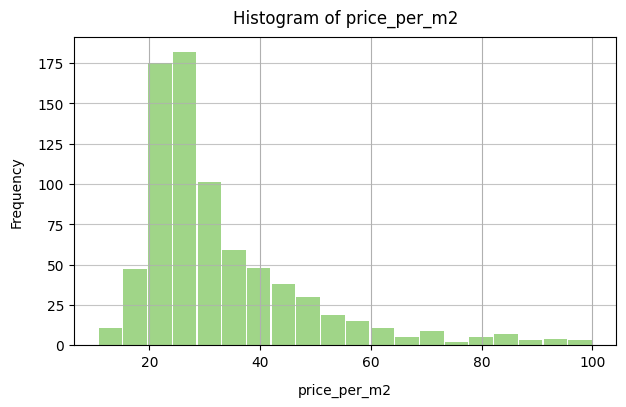

In [3]:
# Plot Histogram
fig = plt.figure( figsize=(7,4))
plt.xticks(fontsize=14, rotation=0)
plt.yticks(fontsize=14, rotation=0)
n, bins, patches = plt.hist(x=df['price_per_m2'], 
                            bins=20, 
                            color='#42AD12',
                            alpha=0.5, 
                            rwidth=0.95
                   )
plt.grid(True)
plt.ticklabel_format(style='plain')
plt.grid(axis='y', alpha=0.75)

# Set labels
plt.xlabel('price_per_m2', fontsize=10, labelpad=10)
plt.ylabel('Frequency', fontsize=10, labelpad=10)
plt.title('Histogram of price_per_m2', fontsize=12, pad=10)

# Set fontsize of tick labels
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

plt.show()

### Show quantiles of price_per_m2

In [4]:
qt_price = df['price_per_m2'].quantile(q=[0.10, 0.25, 0.50, 0.75, 0.90]).round(1)
qt_price

0.10    20.4
0.25    23.4
0.50    28.0
0.75    38.0
0.90    51.6
Name: price_per_m2, dtype: float64

### Create new categorical variable 'price_cat'

In [5]:
# Create labels
labels = ['0 - 19', '20 - 24', '25 - 29', '30 - 34', '>= 35']

# Create new categorical variable
df["price_cat"] = pd.cut(df.price_per_m2, bins=[0, 20, 25, 30, 35, 150], labels=labels)

# Check values
df[['price_per_m2', 'price_cat']].head(10)

,price_per_m2,price_cat
0,29.41,25 - 29
1,23.42,20 - 24
2,25.69,25 - 29
3,27.46,25 - 29
4,21.97,20 - 24
5,21.43,20 - 24
6,28.46,25 - 29
7,23.96,20 - 24
8,30.29,30 - 34
9,17.80,0 - 19


## Create a new categorical variable based on the living area

### Plot histogram of area

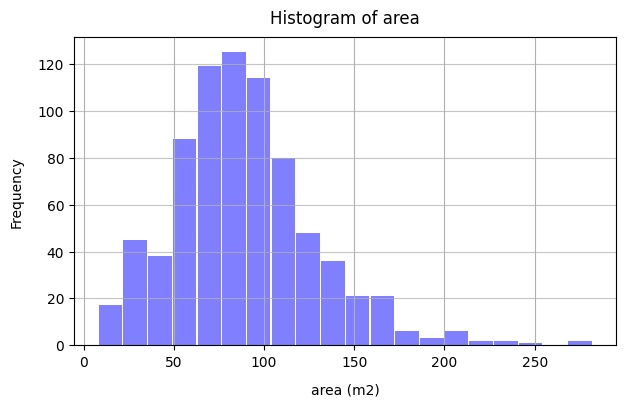

In [6]:
# Plot Histogram
fig = plt.figure( figsize=(7,4))
plt.xticks(fontsize=14, rotation=0)
plt.yticks(fontsize=14, rotation=0)
n, bins, patches = plt.hist(x=df['area'], 
                            bins=20, 
                            color='blue',
                            alpha=0.5, 
                            rwidth=0.95
                   )
plt.grid(True)
plt.ticklabel_format(style='plain')
plt.grid(axis='y', alpha=0.75)

# Set labels
plt.xlabel('area (m2)', fontsize=10, labelpad=10)
plt.ylabel('Frequency', fontsize=10, labelpad=10)
plt.title('Histogram of area', fontsize=12, pad=10)

# Set fontsize of tick labels
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

plt.show()

### Show quantiles of area

In [7]:
qt_area = df['area'].quantile(q=[0.10, 0.25, 0.50, 0.75, 0.90]).round(1)
qt_area

0.10     43.0
0.25     63.2
0.50     86.0
0.75    108.0
0.90    140.0
Name: area, dtype: float64

### Create new categorical variable 'area_cat'

In [8]:
# Create labels
labels = ['0 - 49', '50 - 74', '75 - 99', '100 - 149', '>= 150']

# Create new categorical variable
df["area_cat"] = pd.cut(df['area'], bins=[0, 50, 75, 100, 150, 1000], labels=labels)

# Check values
df[['area', 'area_cat']].head(10)

,area,area_cat
0,49,0 - 49
1,111,100 - 149
2,58,50 - 74
3,118,100 - 149
4,66,50 - 74
5,61,50 - 74
6,65,50 - 74
7,101,100 - 149
8,68,50 - 74
9,191,>= 150


## Create a contingency table with the number of apartments per 'area_cat' versus 'price_cat'

In [9]:
# Contingency table (numbers in the table are apartments)
tab = pd.pivot_table(df[['apartment_id', 'area_cat', 'price_cat']],
                     index=['area_cat'],
                     columns=['price_cat'], 
                     aggfunc='count')
tab

apartment_id                              
price_cat       0 - 19 20 - 24 25 - 29 30 - 34 >= 35
area_cat                                            
0 - 49               2       2       4      13    84
50 - 74              1      40      58      31    64
75 - 99             19      73      66      21    48
100 - 149           31      80      47      22    21
>= 150              20       8       6       5     8

## Perform a Chi-square test on the contingency table
For details see: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html

In [10]:
# 1-alpha
prob = 0.95

# Chi-squared test
stat, p, dof, expected = chi2_contingency(tab)

# Critical value
critical = chi2.ppf(prob, dof)

# Print results of the Chi-square test
print('Expected frequencies:', '\n', expected.round(4), '\n')
print('Critical value:', critical.round(4), '\n')
print('Test statistic:', stat.round(4), '\n')
print('Degrees of freedom:', dof, '\n')
print(f'p-value: {p:.4f}')

Expected frequencies: 
 [[ 9.9031 27.5388 24.5543 12.4806 30.5233]
 [18.2972 50.8811 45.3669 23.0594 56.3953]
 [21.4096 59.5362 53.084  26.9819 65.9884]
 [18.9574 52.7171 47.0039 23.8915 58.4302]
 [ 4.4328 12.3269 10.991   5.5866 13.6628]] 

Critical value: 26.2962 

Test statistic: 286.3147 

Degrees of freedom: 16 

p-value: 0.0000


## Interpretation of the Chi-squared test result

<p>Because the test statistic is larger than the critical value and the p-value is smaller than our significance level apha=0.05, we can reject the null hypothesis, i.e. there is a statistically significant (at the 0.05 significance-level) association between the price-categories and the living-area categories in the contingence table.</p>

## Applying the Chi-squared test to animal behavior

For full study see: https://davida-rosenstrauch.medium.com/applying-the-chi-squared-test-to-animal-behavior-b6cca3f930b8

<img src="https://miro.medium.com/max/640/1*h5JgsNbUy2tuiLgSrkIlyA.png" width="500" align="left"/>

### Contingency table, spotted hyena example

In [11]:
# The numpy array shows how many times each hyena responded (see study above)
table = np.array([[0,4],
                  [7,6],
                  [9,0],
                  [15,10]])

# Create a data frame from 'table'
df_hy = pd.DataFrame(table, columns=[['Female', 'Male']],
             index=['Fear', 'Greeting', 'Aggression', 'No Response'])
df_hy

,Female,Male
Fear,0,4
Greeting,7,6
Aggression,9,0
No Response,15,10


In [12]:
# 1-alpha
prob = 0.95

# Chi-squared test
stat, p, dof, expected_chi2 = chi2_contingency(table)

# Critical value
critical = chi2.ppf(prob, dof)

# Print results of the Chi-square test
print('Expected frequencies:', '\n', expected.round(4), '\n')
print('Critical value:', critical.round(4), '\n')
print('Test statistic:', stat.round(4), '\n')
print('Degrees of freedom:', dof, '\n')
print(f'p-value: {p:.4f}')

Expected frequencies: 
 [[ 9.9031 27.5388 24.5543 12.4806 30.5233]
 [18.2972 50.8811 45.3669 23.0594 56.3953]
 [21.4096 59.5362 53.084  26.9819 65.9884]
 [18.9574 52.7171 47.0039 23.8915 58.4302]
 [ 4.4328 12.3269 10.991   5.5866 13.6628]] 

Critical value: 7.8147 

Test statistic: 12.2754 

Degrees of freedom: 3 

p-value: 0.0065


### Applying the Chi-squared Test to Animal Behavior

In this section, we perform a Chi-squared test based on the provided contingency table to analyze animal behavior.

#### Chi-squared Test Results
The Chi-squared test results are as follows:

- **Expected frequencies**: The expected frequencies under the null hypothesis.
- **Critical value**: The critical value for the Chi-squared distribution with the specified probability.
- **Test statistic**: The Chi-squared test statistic.
- **Degrees of freedom**: The degrees of freedom for the test.
- **p-value**: The p-value for the test.

#### Calculating Expected Frequencies of the Contingency Table

We define a function `calculate_expected_frequencies` to calculate the expected frequencies of a contingency table. The function takes a numpy array or DataFrame with observed frequencies as input and returns the expected frequencies.

#### Function Definition
The function `calculate_expected_frequencies` is defined as follows:


In [13]:
def calculate_expected_frequencies(table):
    """
    Calculates the expected frequencies for a contingency table.
    Input: data - numpy array of observed frequencies.
    Output: numpy array of expected frequencies.
    """
    row_totals = table.sum(axis=1)
    col_totals = table.sum(axis=0)
    total = table.sum()
    
    expected = np.outer(row_totals, col_totals) / total
    return expected



### Applying the Function to the Data
We apply the function to our data to calculate the expected frequencies:

In [14]:
# Apply the function
expected_manual = calculate_expected_frequencies(table)
print("Manually Calculated Expected Frequencies:")
print(expected_manual.round(4))



Manually Calculated Expected Frequencies:
[[ 2.4314  1.5686]
 [ 7.902   5.098 ]
 [ 5.4706  3.5294]
 [15.1961  9.8039]]


### Comparing Expected Frequencies
We compare the expected frequencies calculated by our custom function with those from the chi2_contingency() method.

Here’s the grammatically corrected version of your sentence:

**True** means the results are identical

 and 
 
 **False** means the results differ

In [15]:
# Compare the results
comparison = np.isclose(expected_manual, expected_chi2)
print("\nComparison of Expected Frequencies (True indicates match):")
print(comparison)


Comparison of Expected Frequencies (True indicates match):
[[ True  True]
 [ True  True]
 [ True  True]
 [ True  True]]


#### Calculating Expected Frequencies and Chi-square Test Statistic

We define a function `calculate_expected_frequencies_and_statistic` to calculate the expected frequencies and Chi-square test statistic of a contingency table. The function takes a numpy array or DataFrame with observed frequencies as input and returns the expected frequencies and Chi-square test statistic.

#### Function Definition
The function `calculate_expected_frequencies_and_statistic` is defined as follows:

In [16]:
def calculate_chi_squared(table):
    """
    Calculates the Chi-squared test statistic and expected frequencies.
    Input: data - numpy array of observed frequencies.
    Output: chi2_stat - Chi-squared statistic
            expected - numpy array of expected frequencies.
    """
    expected = calculate_expected_frequencies(table)
    chi2_stat = ((table - expected)**2 / expected).sum()
    return chi2_stat, expected

### Applying the Function to the Data
We apply the function to our data to calculate the expected frequencies and Chi-square test statistic:

In [17]:
# Apply the function
chi2_stat_manual, expected_manual = calculate_chi_squared(table)
print("Manually Calculated Chi-squared Statistic:", chi2_stat_manual)

Manually Calculated Chi-squared Statistic: 12.27543424317618


### Comparing Expected Frequencies and Chi-square Test Statistic
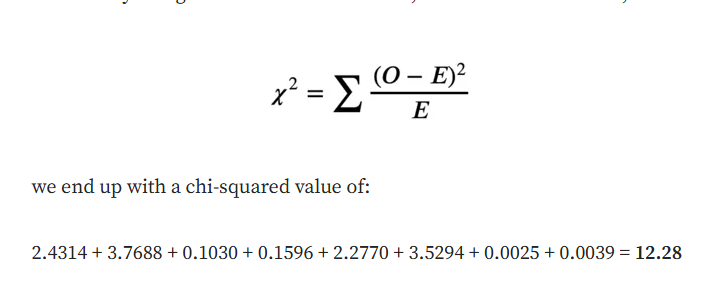

### Conclusion:

The manually calculated Chi-squared statistic (12.2754) and the result in the report (12.28) are almost identical, with only a minor rounding difference.

Final Conclusion: The results of the original study are correct, as the manually calculated Chi-squared statistic aligns with the reported value in the study.

### Jupyter notebook --footer info-- (please always provide this at the end of each submitted notebook)

In [18]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')

-----------------------------------
NT
Windows | 10
Datetime: 2024-11-25 16:20:05
Python Version: 3.12.0
-----------------------------------
